In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
df = pd.read_excel(r'total.xlsx',header=0, index_col=0)
#df=df.set_index('date')
df.head()

,total
date,
2020-01-23 00:00:00,555
2020-01-24 00:00:00,653
2020-01-25 00:00:00,941
2020-01-26 00:00:00,1434
2020-01-27 00:00:00,2118


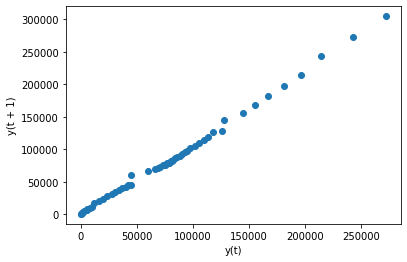

In [23]:
from pandas.plotting import lag_plot
lag_plot(df)


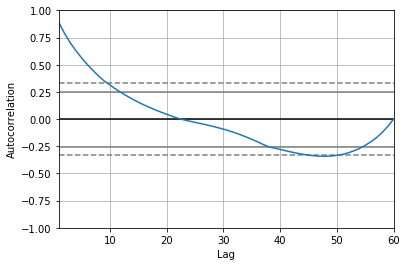

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
pyplot.show()

In [ ]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot

lag_plot(df)
pyplot.show()

3888298.540806966
predicted=165474.123092, expected=167446.000000
7366312.002008771
predicted=178812.904939, expected=181527.000000
14109260.722364364
predicted=193385.770411, expected=197142.000000
15873055.177749082
predicted=210925.899703, expected=214910.000000
177443225.04247737
predicted=229387.218302, expected=242708.000000
111182922.65218815
predicted=261621.668696, expected=272166.000000
108725446.96429141
predicted=294096.850487, expected=304524.000000
Test MSE: 62655503.015


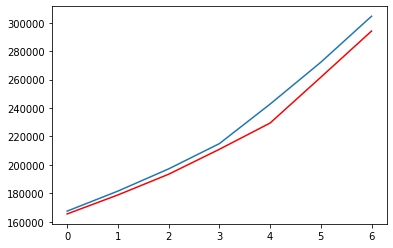

In [20]:
from sklearn.metrics import mean_squared_error
X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [21]:
from sklearn.metrics import r2_score
r2_score(test, predictions)


0.9706400194615131